In [49]:
# Importing the necessary packages
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, SparkSession
from pyspark.sql.functions import count, col
from pyspark.sql.functions import col, skewness, kurtosis

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyspark.sql.functions as func

In [2]:
# Create a Spark context
spark = SparkSession.builder.getOrCreate()
sqlContext = SQLContext(spark)

# --------------------------PROBLEM STATEMENT 1 -----------------------------------------------

In [3]:
## Loading the data form part1 client sample amd reading it to a dataframe
df = sqlContext.read.format("csv").option("header","true").load('client_stats_sample_0225part1.csv')


In [4]:
df.count()

350000

In [5]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- location_id: string (nullable = true)
 |-- client_mac: string (nullable = true)
 |-- freq_band: string (nullable = true)
 |-- mac_address: string (nullable = true)
 |-- country: string (nullable = true)
 |-- vendor_name: string (nullable = true)
 |-- rssi_percs_25: string (nullable = true)
 |-- rssi_percs_75: string (nullable = true)
 |-- isp: string (nullable = true)
 |-- total_bytes_tx: string (nullable = true)
 |-- total_bytes_rx: string (nullable = true)
 |-- ts: string (nullable = true)
 |-- txWeightedPhyRate: string (nullable = true)
 |-- rxWeightedPhyRate: string (nullable = true)
 |-- idtype: string (nullable = true)
 |-- is_static: string (nullable = true)
 |-- weighted_prr_tx: string (nullable = true)
 |-- weighted_prr_rx: string (nullable = true)
 |-- num_samples: string (nullable = true)
 |-- is_connected_to_pod: string (nullable = true)
 |-- pod_serial: string (nullable = true)
 |-- control_group: string (nullable = true)
 |-- b

In [6]:
#Selecting required columns for analysis
df_main = df.select("rssi_percs_25", 'rxWeightedPhyRate', 'txWeightedPhyRate')
df_main.show()

+-------------+-----------------+-----------------+
|rssi_percs_25|rxWeightedPhyRate|txWeightedPhyRate|
+-------------+-----------------+-----------------+
|        -64.0|         85.17462|         88.45363|
|        -64.0|       116.114296|        125.81183|
|        -64.0|        97.602585|       113.710815|
|        -64.0|         93.59775|         98.49928|
|        -60.0|        64.956215|        50.702835|
|        -61.0|         63.83611|        50.534744|
|        -61.0|        61.104904|        49.119404|
|        -59.0|           64.735|        54.749767|
|        -58.0|         72.22222|         72.22222|
|        -57.0|         57.91453|        72.085495|
|        -58.0|         72.22222|         72.22221|
|        -58.0|         72.22222|         72.22221|
|        -47.0|         67.61316|         72.22222|
|        -43.0|        36.386463|         72.22207|
|        -43.0|        51.480503|         72.22222|
|        -45.0|         67.04335|         72.22222|
|        -63

In [7]:
#Null value in selected features
null_value_counts = {i:df_main.filter(df_main[i].isNull()).count() for i in df_main.columns}
null_value_counts

{'rssi_percs_25': 367, 'rxWeightedPhyRate': 4686, 'txWeightedPhyRate': 12342}

In [8]:
#Dropping the null values in selected features
df_main.dropna(how='any')

DataFrame[rssi_percs_25: string, rxWeightedPhyRate: string, txWeightedPhyRate: string]

# Spread of rx ,tx and rssi_percs_25

In [9]:

pdf = df_main.toPandas()

In [10]:
# convert values to numeric 
cols = pdf.columns
pdf[cols] = pdf[cols].apply(pd.to_numeric, errors='coerce', axis=1)

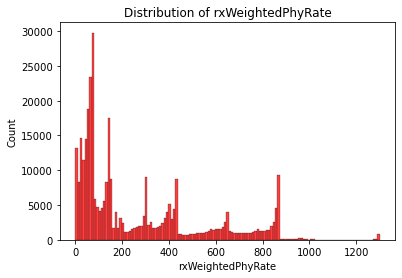

In [37]:
# plot for histgram for rxWeightedPhyRate
plt.title("Distribution of rxWeightedPhyRate")
sns.histplot(pdf['rxWeightedPhyRate'],color="red")
plt.show()

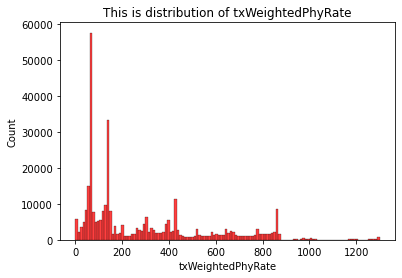

In [43]:
# plot for histgram for rxWeightedPhyRate
plt.title("Distribution of txWeightedPhyRate")
sns.histplot(pdf['txWeightedPhyRate'],color="red")
plt.show()

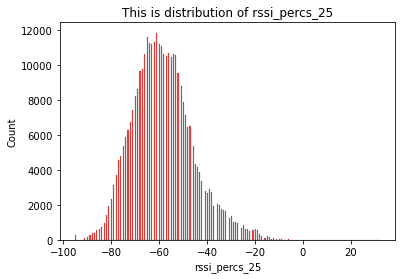

In [39]:
# plot for histgram for rxWeightedPhyRate
plt.title("Distribution of rssi_percs_25")
sns.histplot(pdf['rssi_percs_25'],color="red")
plt.show()

In [14]:
# Create a new dataframe with the given condition
new_df = (pdf[pdf['rssi_percs_25'].between(-85, -65, inclusive=True)]).\
        groupby('rssi_percs_25')['rxWeightedPhyRate', 'txWeightedPhyRate', 'rssi_percs_25'].\
        mean()

In [15]:
new_df.shape

(21, 3)

In [16]:
# print the complete dataframe 
new_df.head(30)

,rxWeightedPhyRate,txWeightedPhyRate,rssi_percs_25
rssi_percs_25,,,
-85.0,20.423385,41.451343,-85.0
-84.0,22.307510,44.770926,-84.0
-83.0,30.096211,61.622073,-83.0
-82.0,36.817320,77.250330,-82.0
-81.0,45.578283,100.689131,-81.0
-80.0,50.545181,97.429977,-80.0
-79.0,55.060912,100.335192,-79.0
-78.0,61.192598,102.696797,-78.0
-77.0,68.631257,107.988843,-77.0


# Histgram for average of tx and rx weighted phy rate between -85 and -65 db in 1 db steps

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


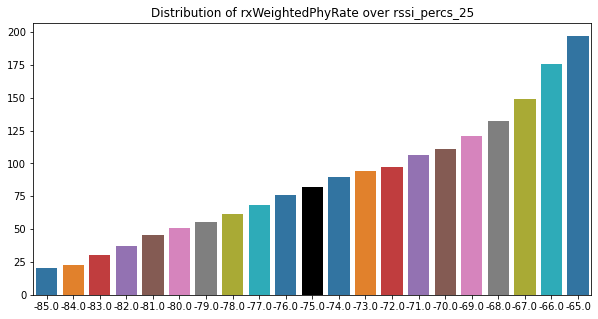

In [17]:
x = new_df['rssi_percs_25'].values.tolist()
y = new_df['rxWeightedPhyRate'].values.tolist()

# Histogram plot for rxWeightedPhyRate
plt.figure(figsize=(10, 5))
plt.title("Distribution of rxWeightedPhyRate over rssi_percs_25")
sns.barplot(x, y,ci=None,palette=["C0","C1","C3","C4","C5","C6","C7","C8","C9","C10","k"])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


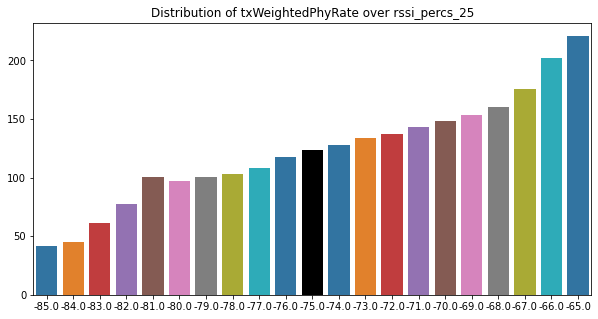

In [18]:
x = new_df['rssi_percs_25'].values.tolist()
y = new_df['txWeightedPhyRate'].values.tolist()

# Histogram plot for txWeightedPhyRate
plt.figure(figsize=(10, 5))
plt.title("Distribution of txWeightedPhyRate over rssi_percs_25")
sns.barplot(x, y,ci=None,palette=["C0","C1","C3","C4","C5","C6","C7","C8","C9","C10","k"])
plt.show()

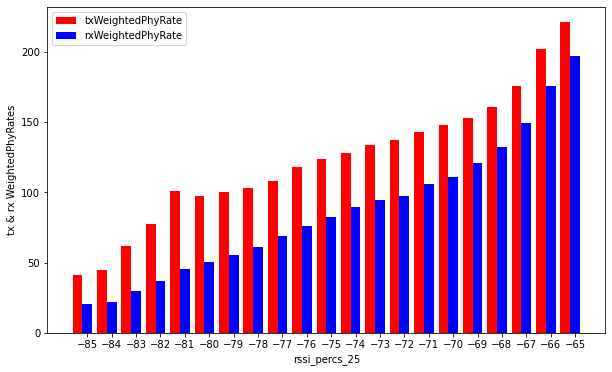

In [42]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
width = 0.4
ax.bar(new_df['rssi_percs_25']-width,new_df['txWeightedPhyRate'],width,color='r',label='txWeightedPhyRate')
ax.bar(new_df['rssi_percs_25'],new_df['rxWeightedPhyRate'],width,color='b',label='rxWeightedPhyRate')
ax.legend()
plt.xlabel('rssi_percs_25')
plt.xticks(np.arange(-85,-64,1))
plt.ylabel('tx & rx WeightedPhyRates')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff274550278>]],
      dtype=object)

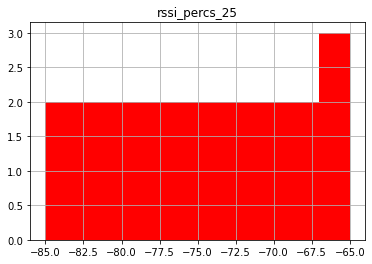

In [47]:
#rssi_percs_25 in histogram
new_df.hist('rssi_percs_25',bins=10,color="red")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2742df7b8>]],
      dtype=object)

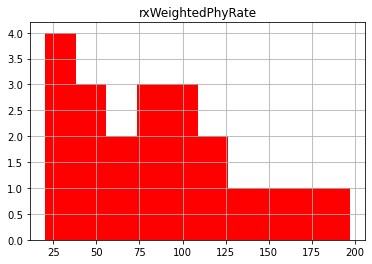

In [46]:
#rxWeightedPhyRate in histogram
new_df.hist('rxWeightedPhyRate',bins=10,color="red")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff26bf9e940>]],
      dtype=object)

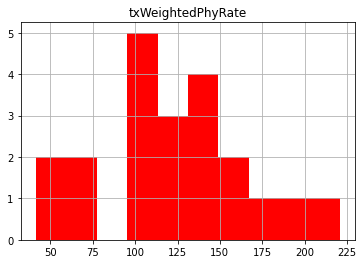

In [45]:
#txWeightedPhyRate in histogram
new_df.hist('txWeightedPhyRate',bins=10,color="red")

In [19]:
# Data export to csv 
new_df.to_csv("data_for_ingestion.csv")

# --------------------------PROBLEM STATEMENT 2 -----------------------------------------------

In [20]:
#Data sample 2
df = sqlContext.read.format("csv").option("header","true").load('client_stats_sample_0225part2.csv')

In [21]:
# how many rows are there in dataset
df.count()

350596

In [22]:
# What is the schema of dataframe
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- location_id: string (nullable = true)
 |-- client_mac: string (nullable = true)
 |-- freq_band: string (nullable = true)
 |-- mac_address: string (nullable = true)
 |-- country: string (nullable = true)
 |-- vendor_name: string (nullable = true)
 |-- rssi_percs_25: string (nullable = true)
 |-- rssi_percs_75: string (nullable = true)
 |-- isp: string (nullable = true)
 |-- total_bytes_tx: string (nullable = true)
 |-- total_bytes_rx: string (nullable = true)
 |-- ts: string (nullable = true)
 |-- txWeightedPhyRate: string (nullable = true)
 |-- rxWeightedPhyRate: string (nullable = true)
 |-- idtype: string (nullable = true)
 |-- is_static: string (nullable = true)
 |-- weighted_prr_tx: string (nullable = true)
 |-- weighted_prr_rx: string (nullable = true)
 |-- num_samples: string (nullable = true)
 |-- is_connected_to_pod: string (nullable = true)
 |-- pod_serial: string (nullable = true)
 |-- control_group: string (nullable = true)
 |-- b

In [23]:
### Select features of interest for analysis as descbied in problem
df_main = df.select("mac_address", "client_mac","freq_band","rssi_percs_25")
df_main.show()

+--------------------+--------------------+---------+-------------+
|         mac_address|          client_mac|freq_band|rssi_percs_25|
+--------------------+--------------------+---------+-------------+
|5b969ea8efcc5d3e1...|81294f9c314119e79...|       5G|        -62.0|
|9cd4189fefcd878d5...|c544851fa0c7d8450...|       5G|        -37.0|
|9cd4189fefcd878d5...|c544851fa0c7d8450...|       5G|        -37.0|
|9cd4189fefcd878d5...|c544851fa0c7d8450...|       5G|        -37.0|
|9cd4189fefcd878d5...|c544851fa0c7d8450...|       5G|        -37.0|
|c6ecd62a6319f6790...|412adb9ac900c7125...|     2.4G|        -61.0|
|c6ecd62a6319f6790...|412adb9ac900c7125...|     2.4G|        -61.0|
|c6ecd62a6319f6790...|412adb9ac900c7125...|     2.4G|        -61.0|
|c6ecd62a6319f6790...|412adb9ac900c7125...|     2.4G|        -61.0|
|c897d58e4c62b048d...|5d3fb54faf8938363...|       5G|        -38.0|
|c897d58e4c62b048d...|5d3fb54faf8938363...|       5G|        -38.0|
|c897d58e4c62b048d...|5d3fb54faf8938363...|     

In [24]:
#Frequencies in client mac 
df.stat.crosstab("client_mac", "freq_band").show()

+--------------------+----+---+
|client_mac_freq_band|2.4G| 5G|
+--------------------+----+---+
|6c108075386b9bac5...|   0| 13|
|926b265569cc677b8...|  52|  0|
|64aaa39a634c845c3...|   4|  0|
|e85310fe4c4d96b7a...|   0| 48|
|9694df765bee22177...|   4| 35|
|c92150b6204bb09a1...|   0| 48|
|991f0219bf779f92c...|   0| 48|
|49e4a625381b85b59...|  44|  0|
|770bf9fd4898249c9...|  48|  0|
|c5cb976ee8161e4e9...|   0| 12|
|7644580503a3cf67f...|  48|  0|
|03c829e8ae46efe67...|  52|  0|
|20c423411d4752114...|   0| 44|
|bebf74bee765ed470...|  48|  0|
|15b102383f5ab6ac0...|   0| 48|
|1151b29fa53a37304...|   9| 43|
|468d4950090d9606c...|   0| 52|
|40cd4df24ef98b291...|   0| 48|
|3cced5d8859dea268...|   1|  7|
|ae933e3bbd46c58cc...|   0| 19|
+--------------------+----+---+
only showing top 20 rows



# Total Count

In [68]:
## Devices per freq_band 
value_24g = df_main.filter(col("freq_band")=='2.4G').groupBy("freq_band").count()
# percetage of the 2.4G device in complete dataset
pct_24g = value_24g.select('count').first()[0]/df_main.count()
print("Percetage of devices in 2.4G", pct_24g)

Percetage of devices in 2.4G 0.45612043491654214


In [69]:
## Devices per freq_band 
value_5g = df_main.filter(col("freq_band")=='5G').groupBy("freq_band").count()

# percetage of the 5G device in complete dataset
pct_5g = value_5g.select('count').first()[0]/df_main.count()
print("Percetage of devices in 5G", pct_5g)

Percetage of devices in 5G 0.5438795650834579


# unique value count

In [70]:
#Devices per freq band
value_24g = df_main.filter(col("freq_band")=='2.4G').groupBy("freq_band").agg(func.countDistinct('client_mac'))



In [71]:
# percetage of the 2.4G device 
pct_24g = value_24g.select('count(DISTINCT client_mac)').first()[0]/df_main.count()
print("Percetage of devices in 2.4G", pct_24g) 

Percetage of devices in 2.4G 0.01700532806991523


In [72]:
#Devices per freq band
value_5g = df_main.filter(col("freq_band")=='5G').groupBy("freq_band").agg(func.countDistinct('client_mac'))

# percetage of the 2.4G device 
pct_5g = value_5g.select('count(DISTINCT client_mac)').first()[0]/df_main.count()
print("Percetage of devices in 5G", pct_5g) 

Percetage of devices in 5G 0.01734189779689443


# #Implement the  condition for the freq_band

In [32]:
#Checking null values
null_value_counts = {i:df_main.filter(df[i].isNull()).count() for i in df_main.columns}
null_value_counts

{'mac_address': 0, 'client_mac': 0, 'freq_band': 0, 'rssi_percs_25': 305}

In [33]:
from pyspark.sql.functions import count, col, when
# calculate the values and assigned to new columns
final_df = df_main.\
        withColumn("new_freq_band", when((col("rssi_percs_25") >= -60 ) & (col("freq_band")=='2.4G'), "5G").\
        when((col("rssi_percs_25") <= -75 ) & (col("freq_band")=='5G'), "2.4G").\
                   when((col("rssi_percs_25") > -75 ) & (col("freq_band")=='5G'), "5G").\
                   when((col("rssi_percs_25") <= -60 ) & (col("freq_band")=='2.4G'), "2.4G").\
                    otherwise("ERROR"))
    

In [34]:
final_df.groupBy("new_freq_band").count().show()

+-------------+------+
|new_freq_band| count|
+-------------+------+
|        ERROR|   305|
|         2.4G|105754|
|           5G|244537|
+-------------+------+



In [62]:
final_df.show()

+--------------------+--------------------+---------+-------------+-------------+
|         mac_address|          client_mac|freq_band|rssi_percs_25|new_freq_band|
+--------------------+--------------------+---------+-------------+-------------+
|5b969ea8efcc5d3e1...|81294f9c314119e79...|       5G|        -62.0|           5G|
|9cd4189fefcd878d5...|c544851fa0c7d8450...|       5G|        -37.0|           5G|
|9cd4189fefcd878d5...|c544851fa0c7d8450...|       5G|        -37.0|           5G|
|9cd4189fefcd878d5...|c544851fa0c7d8450...|       5G|        -37.0|           5G|
|9cd4189fefcd878d5...|c544851fa0c7d8450...|       5G|        -37.0|           5G|
|c6ecd62a6319f6790...|412adb9ac900c7125...|     2.4G|        -61.0|         2.4G|
|c6ecd62a6319f6790...|412adb9ac900c7125...|     2.4G|        -61.0|         2.4G|
|c6ecd62a6319f6790...|412adb9ac900c7125...|     2.4G|        -61.0|         2.4G|
|c6ecd62a6319f6790...|412adb9ac900c7125...|     2.4G|        -61.0|         2.4G|
|c897d58e4c62b04

# Total count 


In [74]:
## Devices per freq_band
new_model_value_24g = final_df.filter(col("new_freq_band")=='2.4G').groupBy("new_freq_band").count()
new_model_pct_24g = new_model_value_24g.select('count').first()[0]/final_df.count()\

print("percentage of the 2.4G device ", new_model_pct_24g)

percentage of the 2.4G device  0.3016406348047325


In [76]:
## Devices per freq_band
new_model_value_5g = final_df.filter(col("new_freq_band")=='5G').groupBy("new_freq_band").count()
new_model_pct_5g = new_model_value_5g.select('count').first()[0]/final_df.count()\

print("percentage of the 5G device ", new_model_pct_5g)

percentage of the 5G device  0.697489418019601


# Unique count

In [73]:
## Devices per freq_band
new_model_value_24g = final_df.filter(col("new_freq_band")=='2.4G').groupBy("new_freq_band").agg(func.countDistinct('client_mac'))

new_model_pct_24g = new_model_value_24g.select('count(DISTINCT client_mac)').first()[0]/final_df.count()

print("percentage of the 2.4G device ", new_model_pct_24g)

percentage of the 2.4G device  0.013753722232997524


In [80]:
## Devices per freq_band
new_model_value_5g = final_df.filter(col("new_freq_band")=='5G').groupBy("new_freq_band").agg(func.countDistinct('client_mac'))

new_model_pct_5g = new_model_value_5g.select('count(DISTINCT client_mac)').first()[0]/final_df.count()

print("percentage of the 5G device ", new_model_pct_5g)

percentage of the 5G device  0.022418966559801023
